# Calcium imaging in SMA and M1 of macaques

This notebook was AI-generated using dandi-notebook-gen and has not been fully verified.
Use caution when interpreting the code or results. Specifically, the AI can make factual claims and observations that are not valid.

This notebook explores the contents of Dandiset 001174, which contains calcium imaging data from the supplementary motor (SMA) and primary motor areas (M1) in four rhesus macaques. The data was acquired using miniature microscopes to study activity patterns of projection neurons.

More information about this dataset can be found at the [DANDI Archive](https://dandiarchive.org/dandiset/001174).

The corresponding publication can be found at: Galvan, Adriana; Martel, Anne-Caroline; Pittard, Damien; Devergnas, Annaelle; Risk, Benjamin; Nassi, Jonathan J.; Yu, Waylin; Downer, Joshua D. ; Wichmann, Thomas (2025) Calcium imaging in SMA and M1 of macaques (Version draft) [Data set]. DANDI Archive. https://dandiarchive.org/dandiset/001174/draft

## Installing Packages

Before running this notebook, you will need to install the following packages:

```bash
pip install lindi pynwb matplotlib numpy seaborn
```

In [1]:
from dandi.dandiapi import DandiAPIClient
client = DandiAPIClient()
dandiset = client.get_dandiset("001174")
assets = list(dandiset.get_assets())

The following code lists all the assets in the Dandiset.

In [2]:
assets

[RemoteBlobAsset(client=<dandi.dandiapi.DandiAPIClient object at 0x7f2fa487df50>, identifier='a2b04c7f-f671-4a55-ac36-5df4d842dfc2', path='sub-V/sub-V_ses-20230309T110929_ophys.nwb', size=10659709412, created=datetime.datetime(2024, 11, 22, 15, 1, 36, 265791, tzinfo=TzInfo(UTC)), modified=datetime.datetime(2025, 3, 31, 22, 18, 19, 797333, tzinfo=TzInfo(UTC)), blob='3096eb8b-ce71-44db-a7af-fcad51273109', dandiset_id='001174', version_id='0.250331.2218'),
 RemoteBlobAsset(client=<dandi.dandiapi.DandiAPIClient object at 0x7f2fa487df50>, identifier='de07db56-e7f3-4809-9972-755c51598e8d', path='sub-Q/sub-Q_ophys.nwb', size=790140856, created=datetime.datetime(2025, 2, 2, 2, 8, 42, 723385, tzinfo=TzInfo(UTC)), modified=datetime.datetime(2025, 3, 31, 22, 18, 19, 819769, tzinfo=TzInfo(UTC)), blob='2a7ad2ae-e8a2-4d7f-bfb7-0d9c6cc6649f', dandiset_id='001174', version_id='0.250331.2218'),
 RemoteBlobAsset(client=<dandi.dandiapi.DandiAPIClient object at 0x7f2fa487df50>, identifier='ac161d0e-7642-4

## Loading and Exploring the NWB file

This section demonstrates how to load and explore data from an NWB file within the Dandiset. We will use the file `sub-Q/sub-Q_ophys.nwb` as an example.
Note that the NWB file used here is just one example, and other NWB files in this Dandiset may contain other data formats and modalities.

To load the NWB file, we will use the `lindi` and `pynwb` libraries.

You will need an internet connection to load the NWB file, as the data is streamed from a remote server.

This code was obtained using the dandi-notebook-gen-tools nwb-file-info command.

In [3]:
import pynwb
import lindi

# Load https://api.dandiarchive.org/api/assets/de07db56-e7f3-4809-9972-755c51598e8d/download/
f = lindi.LindiH5pyFile.from_lindi_file("https://lindi.neurosift.org/dandi/dandisets/001174/assets/de07db56-e7f3-4809-9972-755c51598e8d/nwb.lindi.json")
nwb = pynwb.NWBHDF5IO(file=f, mode='r').read()

Now let us print some fields from the NWB file.

In [4]:
nwb.session_description

'Calcium imaging in SMA during the spontaneous condition'

In [5]:
nwb.identifier

'5c2c4bb2-8310-4e0e-ae01-fd872edba928'

In [6]:
nwb.session_start_time

datetime.datetime(2022, 9, 15, 13, 16, 33, 129000, tzinfo=tzlocal())

Let's explore the `OnePhotonSeries` object, which contains the Miniscope imaging data.

In [7]:
OnePhotonSeries = nwb.acquisition["OnePhotonSeries"]
OnePhotonSeries.data # (h5py.Dataset) shape [6041, 320, 200] [ num_frames, num_rows, num_columns ]; dtype <u2

<LindiH5pyDataset: /acquisition/OnePhotonSeries/data>

Let's examine the `RoiResponseSeries` which contains the fluorescence data associated with spatial footprints.

In [8]:
RoiResponseSeries = nwb.processing["ophys"]["Fluorescence"]["RoiResponseSeries"]
RoiResponseSeries.data # (h5py.Dataset) shape [6041, 40]; dtype <f4

<LindiH5pyDataset: /processing/ophys/Fluorescence/RoiResponseSeries/data>

## Visualizing Sample Data

This section demonstrates how to visualize sample data from the NWB file. We will plot the image masks and the RoiResponseSeries data.

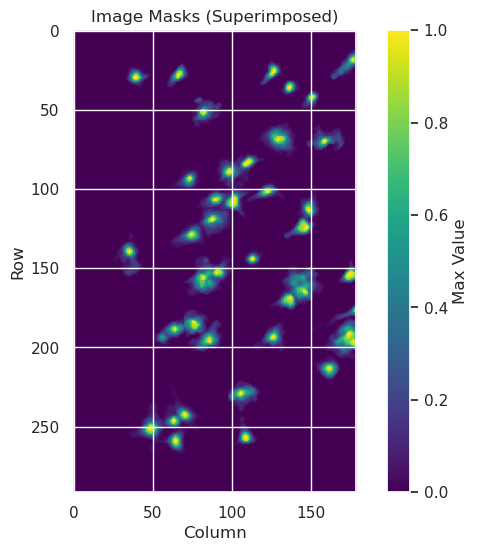

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_theme()

# Get the PlaneSegmentation object
PlaneSegmentation = nwb.processing["ophys"]["ImageSegmentation"]["PlaneSegmentation"]

# Get the image masks data
image_masks = PlaneSegmentation["image_mask"].data

# Plot the image masks superimposed on each other using a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(np.max(image_masks[:], axis=0), cmap="viridis")
plt.title("Image Masks (Superimposed)")
plt.xlabel("Column")
plt.ylabel("Row")
plt.colorbar(label="Max Value")
plt.show()

The image masks represent the spatial footprints of individual cells. The plot shows the location of different cells that were identified in the imaging plane.

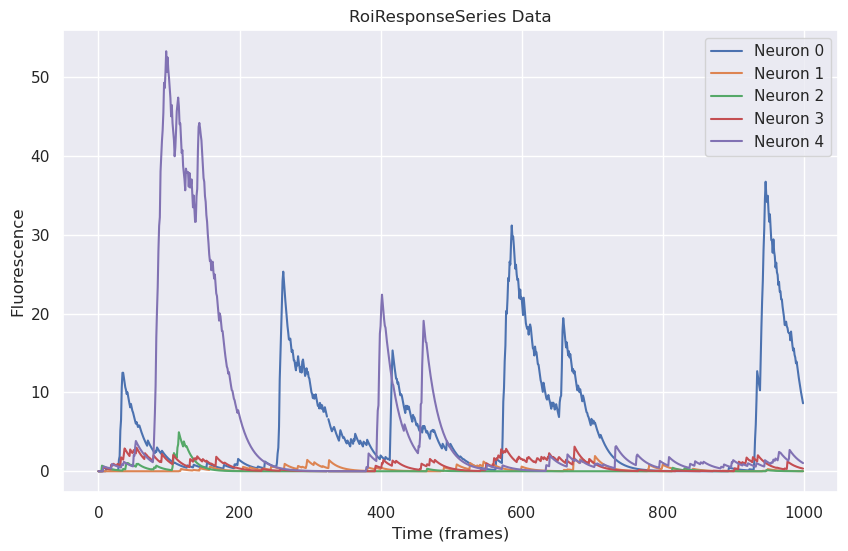

In [10]:
# Get the RoiResponseSeries object
RoiResponseSeries = nwb.processing["ophys"]["Fluorescence"]["RoiResponseSeries"]

# Get the data
data = RoiResponseSeries.data

# Get the number of neurons
num_neurons = data.shape[1]

# Select a subset of neurons to plot (e.g., the first 5)
neurons_to_plot = min(5, num_neurons)

# Select a subset of time points to plot (e.g., the first 1000)
time_points_to_plot = min(1000, data.shape[0])

# Plot the data for the selected neurons
plt.figure(figsize=(10, 6))
for i in range(neurons_to_plot):
    plt.plot(data[:time_points_to_plot, i], label=f"Neuron {i}")

plt.title("RoiResponseSeries Data")
plt.xlabel("Time (frames)")
plt.ylabel("Fluorescence")
plt.legend()
plt.show()

This plot shows the activity of the neurons over time, with some neurons exhibiting larger and more frequent peaks in activity than others.